<a href="https://colab.research.google.com/github/missattack/SeriesTemporaisCripto/blob/main/seriesCrypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install yfinance
import yfinance as yf
import matplotlib.pylab as plt
import warnings
import matplotlib
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
!pip install pmdarima
from pmdarima import auto_arima
import seaborn as sns


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 9.9 MB 43.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


Obtém dados financeiros de dezembro/21 a janeiro/22

In [50]:
df_dados = yf.download("BTC-USD", start="2021-12-01", end="2022-01-31")

[*********************100%***********************]  1 of 1 completed


In [51]:
df_dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,56907.964844,59041.683594,56553.082031,57229.828125,57229.828125,36858195307
2021-12-02,57217.371094,57349.234375,55895.132812,56477.816406,56477.816406,32379968686
2021-12-03,56509.164062,57482.167969,52496.585938,53598.246094,53598.246094,39789134215
2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,61385677469
2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,49368.847656,37198201161


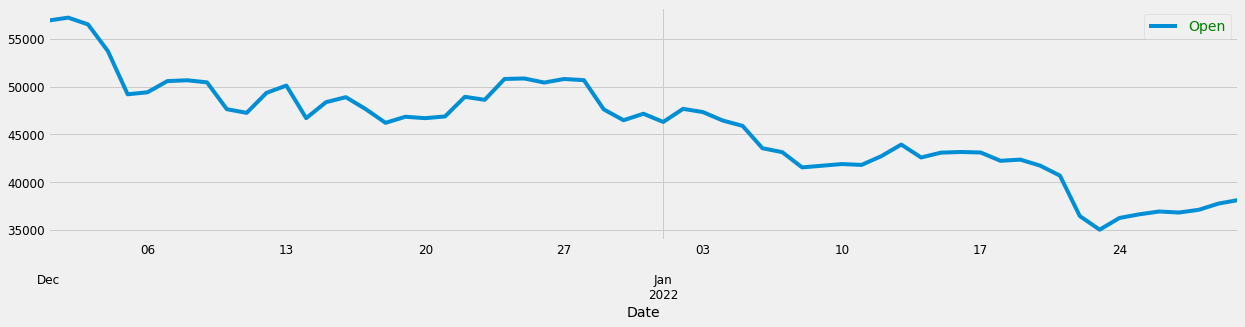

In [52]:
df_dados[["Open"]].plot(figsize = (19, 4)) 
plt.show()

Decomposição - Aditivo 

In [53]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
df_dados_open = df_dados.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

In [19]:
df_dados_open.head()

,Open
Date,
2021-12-01,56907.964844
2021-12-02,57217.371094
2021-12-03,56509.164062
2021-12-04,53727.878906
2021-12-05,49201.519531


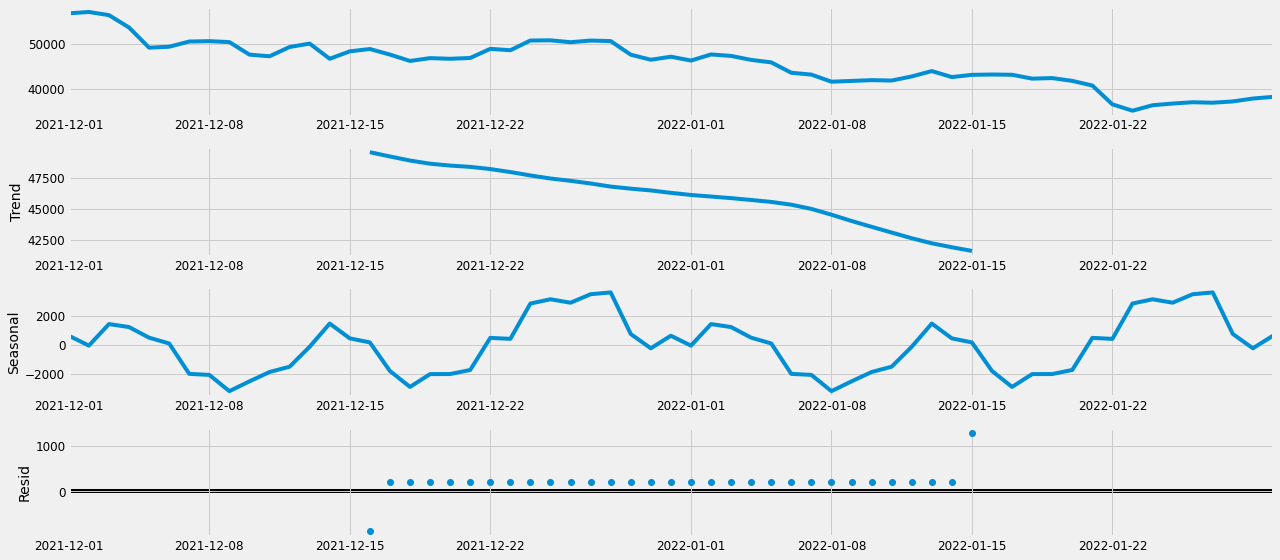

In [54]:
decomposicao = sm.tsa.seasonal_decompose(x=df_dados_open, freq=30, model='additive')
fig = decomposicao.plot()
plt.show()

Decomposição - Multiplicativo

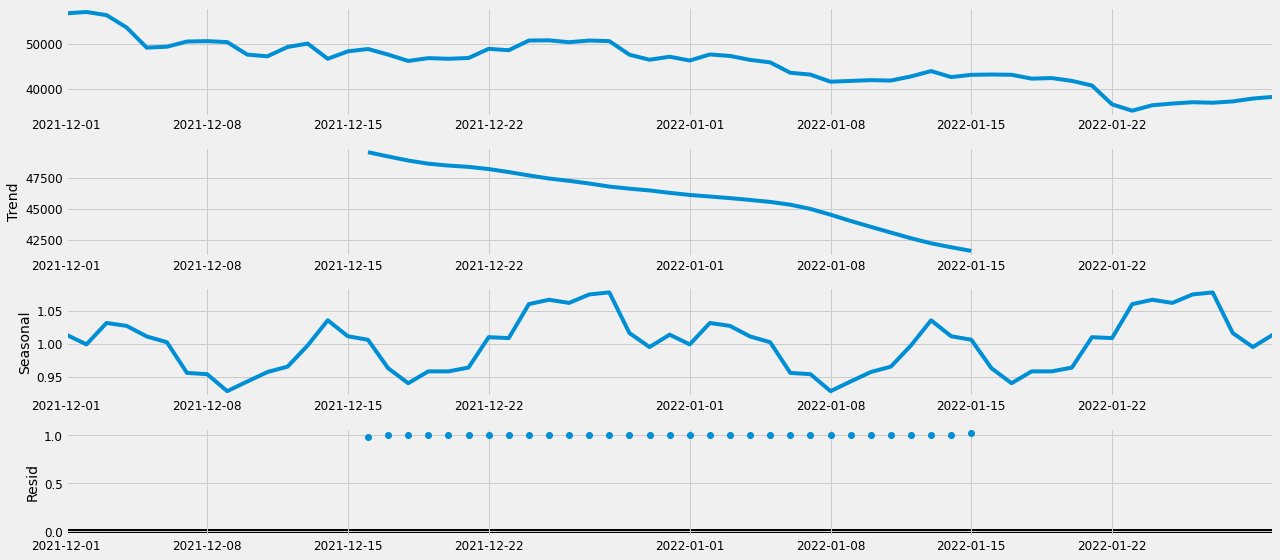

In [55]:
decomposicao = sm.tsa.seasonal_decompose(x=df_dados_open, freq=30, model='multiplicative')
fig = decomposicao.plot()
plt.show()

Média móvel 

In [58]:
df_dados = df_dados['Open'].to_frame()
df_dados['SMA'] = df_dados['Open'].rolling(2).mean()
# remove nulos
df_dados.dropna(inplace=True)
print(df_dados)

                    Open           SMA
Date                                  
2021-12-02  57217.371094  57062.667969
2021-12-03  56509.164062  56863.267578
2021-12-04  53727.878906  55118.521484
2021-12-05  49201.519531  51464.699219
2021-12-06  49413.480469  49307.500000
2021-12-07  50581.828125  49997.654297
2021-12-08  50667.648438  50624.738281
2021-12-09  50450.082031  50558.865234
2021-12-10  47642.144531  49046.113281
2021-12-11  47264.632812  47453.388672
2021-12-12  49354.855469  48309.744141
2021-12-13  50114.742188  49734.798828
2021-12-14  46709.824219  48412.283203
2021-12-15  48379.753906  47544.789062
2021-12-16  48900.464844  48640.109375
2021-12-17  47653.730469  48277.097656
2021-12-18  46219.253906  46936.492188
2021-12-19  46853.867188  46536.560547
2021-12-20  46707.062500  46780.464844
2021-12-21  46886.078125  46796.570312
2021-12-22  48937.097656  47911.587891
2021-12-23  48626.343750  48781.720703
2021-12-24  50806.050781  49716.197266
2021-12-25  50854.917969 

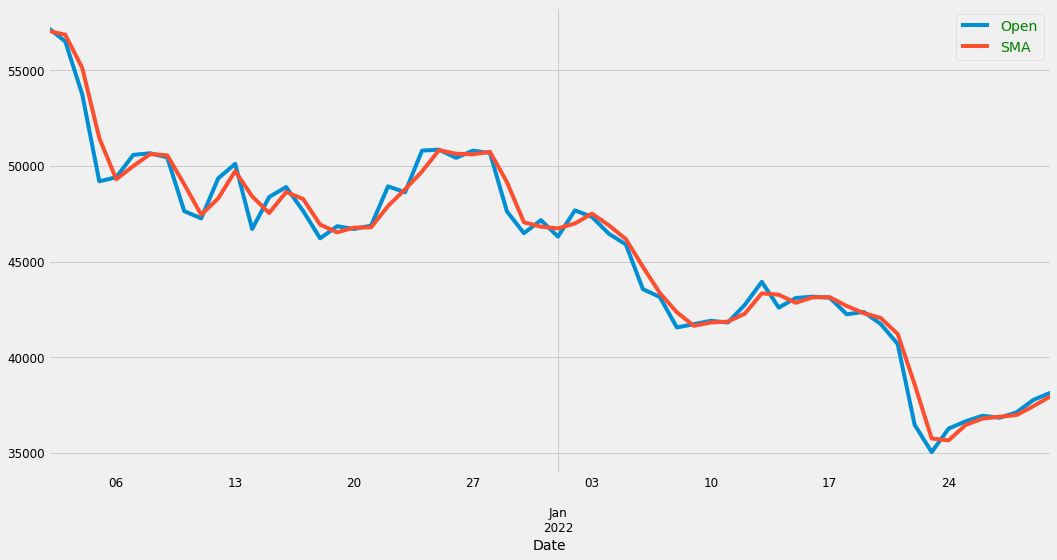

In [59]:
df_dados[['Open', 'SMA']].plot(figsize=(16, 8))

Modelo de Previsao - treino 70% teste 30%

preditado=41981.968660, esperado=42742.179688
preditado=42707.058302, esperado=43946.742188
preditado=43901.404443, esperado=42598.871094
preditado=42507.773348, esperado=43101.898438
preditado=42960.653315, esperado=43172.039062
preditado=43104.225798, esperado=43118.121094
preditado=43243.377388, esperado=42250.074219
preditado=42188.994274, esperado=42374.039062
preditado=42401.753107, esperado=41744.027344
preditado=41807.186214, esperado=40699.605469
preditado=40819.956340, esperado=36471.589844
preditado=36516.404091, esperado=35047.359375
preditado=35289.380715, esperado=36275.734375
preditado=36706.387324, esperado=36654.804688
preditado=37166.782486, esperado=36950.515625
preditado=37003.262828, esperado=36841.878906
preditado=36666.300700, esperado=37128.445312
preditado=37078.051204, esperado=37780.714844
preditado=37751.726815, esperado=38151.917969
Test RMSE: 1253.871


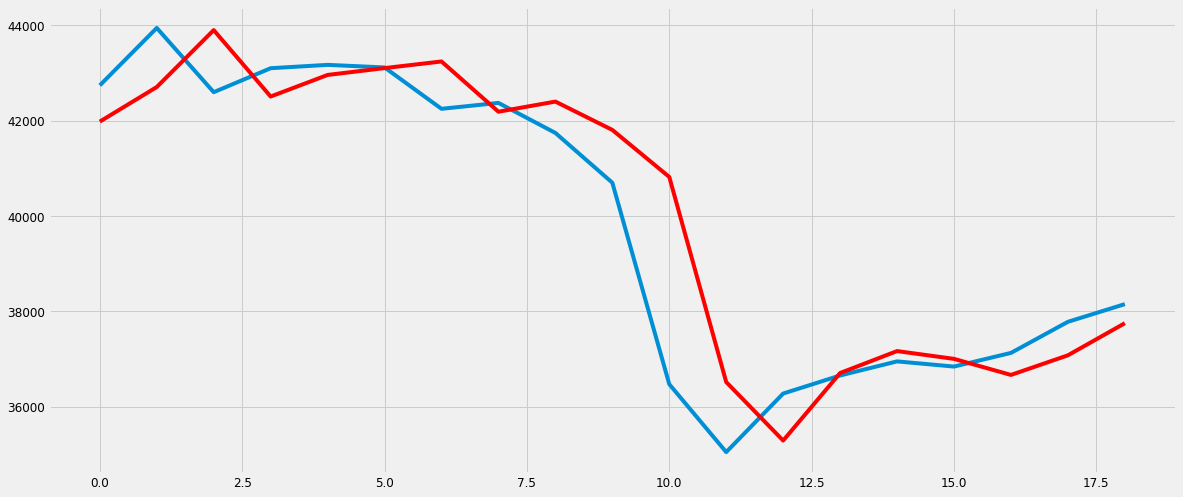

In [78]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

X = df_dados_open.values

size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
              model = ARIMA(history, order=(5,1,0))
              model_fit = model.fit()
              output = model_fit.forecast()
              yhat = output[0]
              predictions.append(yhat)
              obs = test[t]
              history.append(obs)
              print('preditado=%f, esperado=%f' % (yhat, obs))
# resultado
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test) 
plt.plot(predictions, color='red') 
plt.show()